In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib as plt
from glob import glob
sns.set_theme(style="whitegrid")

In [2]:
def read_pickle(model, lang, layer, seed):
    folder = '/home/kushal/SentEval/examples/' + model + '/'
    if lang == "English":
        filename = f"{model}_p=mean_l={layer}_t=4_s={seed}.pickle"
    else:
        filename = f"{model}_p=mean_l={layer}_lg={lang}_s={seed}.pickle"

    with open(folder + filename, 'rb') as handle:
    #with open(filename, 'rb') as handle:
        data = pickle.load(handle)
    df_list = []
    df_scores = {}
    for key, index in data.items():
        # print(key)
        score_dict = {'DevAcc': index['devacc'], 'Acc': index['acc'], 'NDev': index['ndev'], 'NTest': index['ntest']}
        list_dict = {'indexes':list(index['indexes']), 'targets':list(index['targets']), 'predictions':list(index['predictions'])}
        df_l = pd.DataFrame.from_dict(list_dict)
        df_scores[key]=score_dict
        df_list.append(df_l)
    df = pd.DataFrame.from_dict(df_scores, orient='index')
    df['Model'] = model
    return df, df_list

In [6]:
def return_df_eng(seed):

    datab = []
    datam = []
    datap = []
    datamp = []
    datav = []
    datapw = []
    
    lang = "English"
    
    for i in range(1,13):
        datab.append(read_pickle('bert', lang, str(i), seed)[0]['DevAcc'])
        # datam.append(read_pickle('mbert', lang, str(i), 'mean')[0]['DevAcc'])
        datap.append(read_pickle('pixel', lang, str(i), seed)[0]['DevAcc'])
        # datamp.append(read_pickle('mpixel', lang, str(i), 'mean')[0]['DevAcc'])
        datav.append(read_pickle('vit-mae', lang, str(i), seed)[0]['DevAcc'])
        datapw.append(read_pickle('pixel-words', lang, str(i), seed)[0]['DevAcc'])
        
    
    tasks = read_pickle('pixel', lang, '1', seed)[0].index
    datasets = read_pickle('pixel', lang, '1', seed)[1]
    baselines = {}
    for i in range(len(tasks)):
        data = datasets[i]
        labels = data['targets'].value_counts()
        majority_baseline = labels.max()/labels.sum()*100
        baselines[tasks[i]] = majority_baseline
            
    baselines = pd.DataFrame.from_dict(baselines, orient='index')
    baseline = []
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    
    dfb = pd.concat(datab, axis=1)
    dfb.columns = list(range(1,13))
    
    # dfm = pd.concat(datam, axis=1)
    # dfm.columns = list(range(1,13))
    
    dfp = pd.concat(datap, axis=1)
    dfp.columns = list(range(1,13))
    
    # dfmp = pd.concat(datamp, axis=1)
    # dfmp.columns = list(range(1,13))
    
    dfv = pd.concat(datav, axis=1)
    dfv.columns = list(range(1,13))
    
    dfpw = pd.concat(datapw, axis=1)
    dfpw.columns = list(range(1,13))
    
    dfbase = pd.concat(baseline, axis=1)
    dfbase.columns = list(range(1,13))
    
    dfb_aux = dfb.T
    dfb_aux['Model'] = 'bert'
    # dfm_aux = dfm.T
    # dfm_aux['Model'] = 'mbert'
    dfp_aux = dfp.T
    dfp_aux['Model'] = 'pixel'
    # dfmp_aux = dfmp.T
    # dfmp_aux['Model'] = 'mpixel'
    dfv_aux = dfv.T
    dfv_aux['Model'] = 'vit-mae'
    dfpw_aux = dfpw.T
    dfpw_aux['Model'] = 'pixel-words'
    dfbase_aux = dfbase.T
    dfbase_aux['Model'] = 'baseline'
    all_list = [dfb_aux, 
                dfp_aux,
                # dfm_aux, 
                # dfmp_aux, 
                dfv_aux,
                dfpw_aux,
                dfbase_aux]
    dev_df = pd.concat(all_list)
    
    return dev_df

In [2]:
def return_df(lang, seed):

    datab = []
    datam = []
    datap = []
    datamp = []
    datax = []
    datav = []
    
    lang = lang
    
    for i in range(1,13):
        datab.append(read_pickle('bert', lang, str(i), seed)[0]['DevAcc'])
        datam.append(read_pickle('mbert', lang, str(i), seed)[0]['DevAcc'])
        datap.append(read_pickle('pixel', lang, str(i), seed)[0]['DevAcc'])
        datamp.append(read_pickle('mpixel', lang, str(i), seed)[0]['DevAcc'])
        datax.append(read_pickle('xlmr', lang, str(i), seed)[0]['DevAcc'])
        datav.append(read_pickle('vit-mae', lang, str(i), seed)[0]['DevAcc'])
        
    
    tasks = read_pickle('pixel', lang, '1', seed)[0].index
    datasets = read_pickle('pixel', lang, '1', seed)[1]
    baselines = {}
    for i in range(len(tasks)):
        data = datasets[i]
        labels = data['targets'].value_counts()
        majority_baseline = labels.max()/labels.sum()*100
        baselines[tasks[i]] = majority_baseline
            
    baselines = pd.DataFrame.from_dict(baselines, orient='index')
    baseline = []
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    
    dfb = pd.concat(datab, axis=1)
    dfb.columns = list(range(1,13))
    
    dfm = pd.concat(datam, axis=1)
    dfm.columns = list(range(1,13))
    
    dfp = pd.concat(datap, axis=1)
    dfp.columns = list(range(1,13))
    
    dfmp = pd.concat(datamp, axis=1)
    dfmp.columns = list(range(1,13))
    
    dfx = pd.concat(datax, axis=1)
    dfx.columns = list(range(1,13))
    
    dfv = pd.concat(datav, axis=1)
    dfv.columns = list(range(1,13))
    
    dfbase = pd.concat(baseline, axis=1)
    dfbase.columns = list(range(1,13))
    
    
    dfb_aux = dfb.T
    dfb_aux['Model'] = 'bert'
    dfm_aux = dfm.T
    dfm_aux['Model'] = 'mbert'
    dfp_aux = dfp.T
    dfp_aux['Model'] = 'pixel'
    dfmp_aux = dfmp.T
    dfmp_aux['Model'] = 'mpixel'
    dfx_aux = dfx.T
    dfx_aux['Model'] = 'xlmr'
    dfv_aux = dfv.T
    dfv_aux['Model'] = 'vit-mae'
    dfbase_aux = dfbase.T
    dfbase_aux['Model'] = 'baseline'
    all_list = [dfb_aux, dfp_aux,
                dfm_aux, dfmp_aux, 
                dfx_aux, dfv_aux,
                dfbase_aux]
    dev_df = pd.concat(all_list)
    
    return dev_df

In [8]:
def return_df_pixel_hindi(lang, seed):

    datab = []
    datam = []
    datap = []
    datamp = []
    datax = []
    datav = []
    dataph = []
    
    lang = lang
    
    for i in range(1,13):
        datab.append(read_pickle('bert', lang, str(i), seed)[0]['DevAcc'])
        datam.append(read_pickle('mbert', lang, str(i), seed)[0]['DevAcc'])
        datap.append(read_pickle('pixel', lang, str(i), seed)[0]['DevAcc'])
        datamp.append(read_pickle('mpixel', lang, str(i), seed)[0]['DevAcc'])
        datax.append(read_pickle('xlmr', lang, str(i), seed)[0]['DevAcc'])
        datav.append(read_pickle('vit-mae', lang, str(i), seed)[0]['DevAcc'])
        dataph.append(read_pickle('pixel-hindi', lang, str(i), seed)[0]['DevAcc'])
        
    
    tasks = read_pickle('pixel', lang, '1', seed)[0].index
    datasets = read_pickle('pixel', lang, '1', seed)[1]
    baselines = {}
    for i in range(len(tasks)):
        data = datasets[i]
        labels = data['targets'].value_counts()
        majority_baseline = labels.max()/labels.sum()*100
        baselines[tasks[i]] = majority_baseline
            
    baselines = pd.DataFrame.from_dict(baselines, orient='index')
    baseline = []
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    
    dfb = pd.concat(datab, axis=1)
    dfb.columns = list(range(1,13))
    
    dfm = pd.concat(datam, axis=1)
    dfm.columns = list(range(1,13))
    
    dfp = pd.concat(datap, axis=1)
    dfp.columns = list(range(1,13))
    
    dfmp = pd.concat(datamp, axis=1)
    dfmp.columns = list(range(1,13))
    
    dfx = pd.concat(datax, axis=1)
    dfx.columns = list(range(1,13))
    
    dfv = pd.concat(datav, axis=1)
    dfv.columns = list(range(1,13))
    
    dfph = pd.concat(dataph, axis=1)
    dfph.columns = list(range(1,13))
    
    dfbase = pd.concat(baseline, axis=1)
    dfbase.columns = list(range(1,13))
    
    
    dfb_aux = dfb.T
    dfb_aux['Model'] = 'bert'
    dfm_aux = dfm.T
    dfm_aux['Model'] = 'mbert'
    dfp_aux = dfp.T
    dfp_aux['Model'] = 'pixel'
    dfmp_aux = dfmp.T
    dfmp_aux['Model'] = 'mpixel'
    dfx_aux = dfx.T
    dfx_aux['Model'] = 'xlmr'
    dfv_aux = dfv.T
    dfv_aux['Model'] = 'vit-mae'
    dfph_aux = dfph.T
    dfph_aux['Model'] = 'pixel-hindi'
    dfbase_aux = dfbase.T
    dfbase_aux['Model'] = 'baseline'
    all_list = [dfb_aux, dfp_aux,
                dfm_aux, dfmp_aux, 
                dfx_aux, dfv_aux,
                dfph_aux, dfbase_aux]
    dev_df = pd.concat(all_list)
    
    return dev_df

In [11]:
def return_df_seeds(lang, seed):

    datab = []
    datam = []
    datap = []
    datamp = []
    datax = []
    datav = []
    
    lang = lang
    
    for i in range(1,13):
        # datab.append(read_pickle('bert', lang, str(i), seed)[0]['DevAcc'])
        # datam.append(read_pickle('mbert', lang, str(i), seed)[0]['DevAcc'])
        datap.append(read_pickle('pixel', lang, str(i), seed)[0]['DevAcc'])
        # datamp.append(read_pickle('mpixel', lang, str(i), seed)[0]['DevAcc'])
        # datax.append(read_pickle('xlmr', lang, str(i), seed)[0]['DevAcc'])
        # datav.append(read_pickle('vit-mae', lang, str(i), seed)[0]['DevAcc'])
        
    
    tasks = read_pickle('pixel', lang, '1', seed)[0].index
    datasets = read_pickle('pixel', lang, '1', seed)[1]
    baselines = {}
    for i in range(len(tasks)):
        data = datasets[i]
        labels = data['targets'].value_counts()
        majority_baseline = labels.max()/labels.sum()*100
        baselines[tasks[i]] = majority_baseline
            
    baselines = pd.DataFrame.from_dict(baselines, orient='index')
    baseline = []
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    
    # dfb = pd.concat(datab, axis=1)
    # dfb.columns = list(range(1,13))
    # 
    # dfm = pd.concat(datam, axis=1)
    # dfm.columns = list(range(1,13))
    # 
    dfp = pd.concat(datap, axis=1)
    dfp.columns = list(range(1,13))
    
    # dfmp = pd.concat(datamp, axis=1)
    # dfmp.columns = list(range(1,13))
    # 
    # dfx = pd.concat(datax, axis=1)
    # dfx.columns = list(range(1,13))
    # 
    # dfv = pd.concat(datav, axis=1)
    # dfv.columns = list(range(1,13))
    
    dfbase = pd.concat(baseline, axis=1)
    dfbase.columns = list(range(1,13))
    
    
    # dfb_aux = dfb.T
    # dfb_aux['Model'] = 'bert'
    # dfm_aux = dfm.T
    # dfm_aux['Model'] = 'mbert'
    dfp_aux = dfp.T
    dfp_aux['Model'] = 'pixel'
    # dfmp_aux = dfmp.T
    # dfmp_aux['Model'] = 'mpixel'
    # dfx_aux = dfx.T
    # dfx_aux['Model'] = 'xlmr'
    # dfv_aux = dfv.T
    # dfv_aux['Model'] = 'vit-mae'
    dfbase_aux = dfbase.T
    dfbase_aux['Model'] = 'baseline'
    all_list = [
                # dfb_aux, 
                dfp_aux]
                # dfm_aux, dfmp_aux, 
                # dfx_aux, dfv_aux,
                # dfbase_aux]
    dev_df = pd.concat(all_list)
    
    return dev_df

In [18]:
def return_df_seeds_models(lang):
    seed = 1111
    datab = []
    datam = []
    datap_1 = []
    datap_2 = []
    datap_3 = []
    datamp = []
    datax = []
    datav = []
    
    lang = lang
    
    for i in range(1,13):
        datab.append(read_pickle('bert', lang, str(i), seed)[0]['DevAcc'])
        datam.append(read_pickle('mbert', lang, str(i), seed)[0]['DevAcc'])
        
        datap_1.append(read_pickle('pixel', lang, str(i), seed)[0]['DevAcc'])
        datap_2.append(read_pickle('pixel', lang, str(i), "8446")[0]['DevAcc'])
        datap_3.append(read_pickle('pixel', lang, str(i), "32873")[0]['DevAcc'])
        
        datamp.append(read_pickle('mpixel', lang, str(i), seed)[0]['DevAcc'])
        datax.append(read_pickle('xlmr', lang, str(i), seed)[0]['DevAcc'])
        datav.append(read_pickle('vit-mae', lang, str(i), seed)[0]['DevAcc'])
        
    
    tasks = read_pickle('pixel', lang, '1', seed)[0].index
    datasets = read_pickle('pixel', lang, '1', seed)[1]
    baselines = {}
    for i in range(len(tasks)):
        data = datasets[i]
        labels = data['targets'].value_counts()
        majority_baseline = labels.max()/labels.sum()*100
        baselines[tasks[i]] = majority_baseline
            
    baselines = pd.DataFrame.from_dict(baselines, orient='index')
    baseline = []
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    
    dfb = pd.concat(datab, axis=1)
    dfb.columns = list(range(1,13))

    dfm = pd.concat(datam, axis=1)
    dfm.columns = list(range(1,13))
    
    dfp_1 = pd.concat(datap_1, axis=1)
    dfp_1.columns = list(range(1,13))
    
    dfp_2 = pd.concat(datap_2, axis=1)
    dfp_2.columns = list(range(1,13))
    
    dfp_3 = pd.concat(datap_3, axis=1)
    dfp_3.columns = list(range(1,13))
    
    dfmp = pd.concat(datamp, axis=1)
    dfmp.columns = list(range(1,13))

    dfx = pd.concat(datax, axis=1)
    dfx.columns = list(range(1,13))

    dfv = pd.concat(datav, axis=1)
    dfv.columns = list(range(1,13))
    
    dfbase = pd.concat(baseline, axis=1)
    dfbase.columns = list(range(1,13))
    
    
    dfb_aux = dfb.T
    dfb_aux['Model'] = 'bert'
    dfm_aux = dfm.T
    dfm_aux['Model'] = 'mbert'
    dfp_1_aux = dfp_1.T
    dfp_1_aux['Model'] = 'pixel'
    dfp_2_aux = dfp_2.T
    dfp_2_aux['Model'] = 'pixel'
    dfp_3_aux = dfp_3.T
    dfp_3_aux['Model'] = 'pixel'
    dfmp_aux = dfmp.T
    dfmp_aux['Model'] = 'mpixel'
    dfx_aux = dfx.T
    dfx_aux['Model'] = 'xlmr'
    dfv_aux = dfv.T
    dfv_aux['Model'] = 'vit-mae'
    dfbase_aux = dfbase.T
    dfbase_aux['Model'] = 'baseline'
    all_list = [
                dfb_aux, 
                dfp_1_aux,
                dfp_2_aux,
                dfp_3_aux,
                dfm_aux, dfmp_aux, 
                dfx_aux, dfv_aux,
                dfbase_aux]
    dev_df = pd.concat(all_list)
    
    return dev_df

In [28]:
def return_df_seeds_models_eng(lang):
    seed = 1111
    datab = []
    # datam = []
    datap_1 = []
    datap_2 = []
    datap_3 = []
    # datamp = []
    # datax = []
    datav = []
    
    lang = lang
    
    for i in range(1,13):
        datab.append(read_pickle('bert', lang, str(i), seed)[0]['DevAcc'])
        # datam.append(read_pickle('mbert', lang, str(i), seed)[0]['DevAcc'])
        
        datap_1.append(read_pickle('pixel', lang, str(i), seed)[0]['DevAcc'])
        datap_2.append(read_pickle('pixel', lang, str(i), "8446")[0]['DevAcc'])
        datap_3.append(read_pickle('pixel', lang, str(i), "32873")[0]['DevAcc'])
        
        # datamp.append(read_pickle('mpixel', lang, str(i), seed)[0]['DevAcc'])
        # datax.append(read_pickle('xlmr', lang, str(i), seed)[0]['DevAcc'])
        datav.append(read_pickle('vit-mae', lang, str(i), seed)[0]['DevAcc'])
        
    
    tasks = read_pickle('pixel', lang, '1', seed)[0].index
    datasets = read_pickle('pixel', lang, '1', seed)[1]
    baselines = {}
    for i in range(len(tasks)):
        data = datasets[i]
        labels = data['targets'].value_counts()
        majority_baseline = labels.max()/labels.sum()*100
        baselines[tasks[i]] = majority_baseline
            
    baselines = pd.DataFrame.from_dict(baselines, orient='index')
    baseline = []
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    baseline.append(baselines)
    
    dfb = pd.concat(datab, axis=1)
    dfb.columns = list(range(1,13))

    # dfm = pd.concat(datam, axis=1)
    # dfm.columns = list(range(1,13))
    
    dfp_1 = pd.concat(datap_1, axis=1)
    dfp_1.columns = list(range(1,13))
    
    dfp_2 = pd.concat(datap_2, axis=1)
    dfp_2.columns = list(range(1,13))
    
    dfp_3 = pd.concat(datap_3, axis=1)
    dfp_3.columns = list(range(1,13))
    
    # dfmp = pd.concat(datamp, axis=1)
    # dfmp.columns = list(range(1,13))
    # 
    # dfx = pd.concat(datax, axis=1)
    # dfx.columns = list(range(1,13))

    dfv = pd.concat(datav, axis=1)
    dfv.columns = list(range(1,13))
    
    dfbase = pd.concat(baseline, axis=1)
    dfbase.columns = list(range(1,13))
    
    
    dfb_aux = dfb.T
    dfb_aux['Model'] = 'bert'
    # dfm_aux = dfm.T
    # dfm_aux['Model'] = 'mbert'
    dfp_1_aux = dfp_1.T
    dfp_1_aux['Model'] = 'pixel'
    dfp_2_aux = dfp_2.T
    dfp_2_aux['Model'] = 'pixel'
    dfp_3_aux = dfp_3.T
    dfp_3_aux['Model'] = 'pixel'
    # dfmp_aux = dfmp.T
    # dfmp_aux['Model'] = 'mpixel'
    # dfx_aux = dfx.T
    # dfx_aux['Model'] = 'xlmr'
    dfv_aux = dfv.T
    dfv_aux['Model'] = 'vit-mae'
    dfbase_aux = dfbase.T
    dfbase_aux['Model'] = 'baseline'
    all_list = [
                dfb_aux, 
                dfp_1_aux,
                dfp_2_aux,
                dfp_3_aux,
                # dfm_aux, dfmp_aux, 
                # dfx_aux, 
                dfv_aux,
                dfbase_aux]
    dev_df = pd.concat(all_list)
    
    return dev_df

In [19]:
language = "Hindi"

Text(0.5, 0, 'Layer')

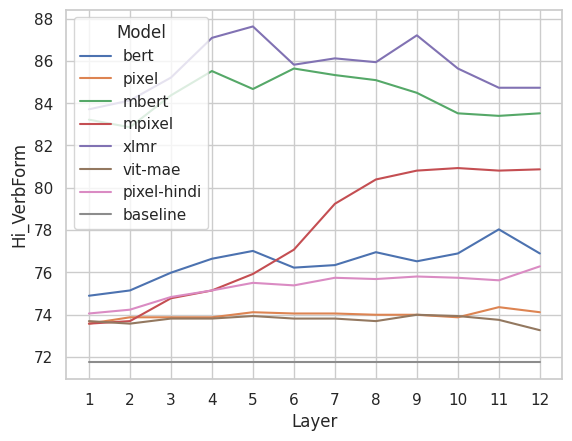

In [10]:
dev_df = return_df_pixel_hindi(language, "1111")

ax = sns.lineplot(data=dev_df, x=dev_df.index, y=dev_df.columns[6], hue='Model')
ax.set_xticks(range(1, 13))
# ax.set_yticks(range(0,101,10))
ax.set_xlabel('Layer')

In [12]:
dev_df_1111 = return_df_seeds(language, '1111')
dev_df_1111['Seed'] = '1111'

In [13]:
dev_df_8446 = return_df_seeds(language, '8446')
dev_df_8446['Seed'] = '8446'

In [14]:
dev_df_32873 = return_df_seeds(language, '32873')
dev_df_32873['Seed'] = '32873'

In [15]:
df_seeds = pd.concat([dev_df_1111, dev_df_8446, dev_df_32873])
df_seeds

,Hi_Tense,Hi_SubjNumber,Hi_ObjNumber,Hi_Aspect,Hi_Mood,Hi_Voice,Hi_VerbForm,Hi_PronType,Hi_SubjGender,Hi_ObjGender,Model,Seed
1,72.24,68.13,79.23,90.98,98.72,91.74,73.57,66.92,66.92,66.92,pixel,1111
2,72.32,68.13,79.23,90.98,98.72,91.74,73.87,67.33,67.33,67.33,pixel,1111
3,72.32,69.47,79.10,90.98,98.72,91.74,73.87,67.50,67.50,67.50,pixel,1111
4,72.47,68.67,79.10,90.98,98.72,91.74,73.87,67.16,67.16,67.16,pixel,1111
5,73.00,71.33,79.23,90.98,98.72,91.74,74.11,67.25,67.25,67.25,pixel,1111
6,73.16,70.53,79.10,91.49,98.72,91.74,74.05,67.25,67.25,67.25,pixel,1111
7,73.08,70.67,79.23,91.27,98.72,91.74,74.05,67.50,67.50,67.50,pixel,1111
8,75.13,72.00,79.10,91.13,98.72,91.74,73.99,67.74,67.74,67.74,pixel,1111
9,74.07,71.60,79.10,91.27,98.72,91.74,73.99,67.50,67.50,67.50,pixel,1111
10,75.97,72.13,79.10,91.20,98.72,91.74,73.87,67.66,67.66,67.66,pixel,1111


Text(0.5, 0, 'Layer')

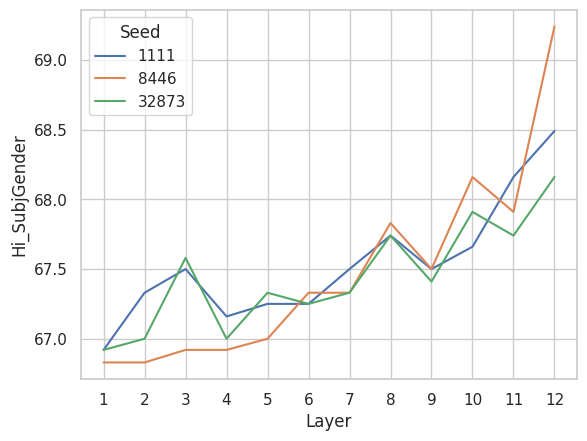

In [16]:
ax = sns.lineplot(data=df_seeds, x=df_seeds.index, y=df_seeds.columns[8], hue='Seed')
ax.set_xticks(range(1,13))
# ax.set_yticks(range(0,101,10))
ax.set_xlabel('Layer')

In [43]:
language = "English"
# dev_df = return_df_seeds_models(language)
dev_df = return_df_seeds_models_eng(language)

dev_df

,Length,WordContent,Depth,TopConstituents,BigramShift,Tense,SubjNumber,ObjNumber,OddManOut,CoordinationInversion,Model
1,97.210000,93.33,37.21,73.78,52.54,87.44,82.69,81.33,53.35,56.47,bert
2,96.540000,91.72,39.99,76.72,71.37,88.40,84.22,82.96,54.23,60.73,bert
3,94.760000,89.17,40.96,78.31,82.55,89.12,83.74,82.92,55.62,61.73,bert
4,94.290000,86.42,42.15,80.07,84.88,89.28,84.64,82.89,56.95,62.34,bert
5,93.010000,83.02,43.03,80.54,87.07,89.46,85.11,83.58,59.48,62.74,bert
...,...,...,...,...,...,...,...,...,...,...,...
8,16.666667,0.10,17.88,5.00,50.00,50.00,50.00,50.00,50.13,50.00,baseline
9,16.666667,0.10,17.88,5.00,50.00,50.00,50.00,50.00,50.13,50.00,baseline
10,16.666667,0.10,17.88,5.00,50.00,50.00,50.00,50.00,50.13,50.00,baseline
11,16.666667,0.10,17.88,5.00,50.00,50.00,50.00,50.00,50.13,50.00,baseline


In [8]:
dev_df = return_df_eng(seed="1111")
dev_df

,Length,WordContent,Depth,TopConstituents,BigramShift,Tense,SubjNumber,ObjNumber,OddManOut,CoordinationInversion,Model
1,97.210000,93.33,37.21,73.78,52.54,87.44,82.69,81.33,53.35,56.47,bert
2,96.540000,91.72,39.99,76.72,71.37,88.40,84.22,82.96,54.23,60.73,bert
3,94.760000,89.17,40.96,78.31,82.55,89.12,83.74,82.92,55.62,61.73,bert
4,94.290000,86.42,42.15,80.07,84.88,89.28,84.64,82.89,56.95,62.34,bert
5,93.010000,83.02,43.03,80.54,87.07,89.46,85.11,83.58,59.48,62.74,bert
6,92.280000,79.10,42.29,81.24,88.27,89.66,85.96,83.82,62.51,65.49,bert
7,91.310000,75.83,42.29,81.20,89.78,89.71,87.83,83.65,64.21,69.22,bert
8,90.540000,72.42,42.53,80.58,90.78,90.11,87.56,84.09,65.48,70.83,bert
9,88.750000,67.95,41.04,79.65,90.82,90.32,87.63,83.52,66.51,72.43,bert
10,85.770000,63.91,40.17,77.70,90.21,90.61,86.84,82.63,66.93,71.30,bert


Text(0.5, 0, 'Layer')

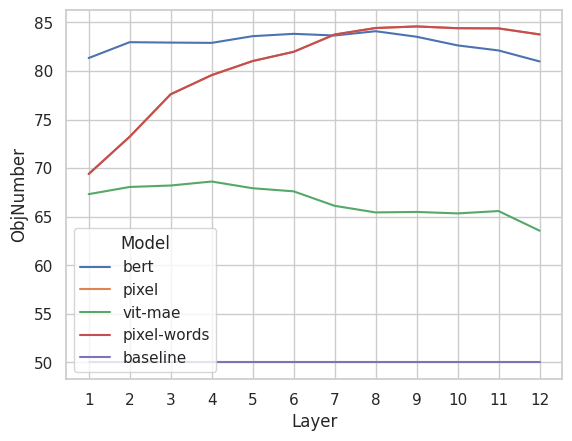

In [17]:
ax = sns.lineplot(data=dev_df, x=dev_df.index, y=dev_df.columns[7], hue='Model')
ax.set_xticks(range(1,13))
# ax.set_yticks(range(0,101,10))
ax.set_xlabel('Layer')

## Checking the predictions

In [3]:
from sklearn.metrics import confusion_matrix

In [88]:
results = read_pickle('pixel', 'Hindi', '1', 'mean')
results[1][0].targets.value_counts().max()/results[1][0].targets.value_counts().sum()

0.715917745620716

In [76]:
task = results[1][-2]

In [77]:
df_confusion = pd.crosstab(task['targets'], task['predictions'], rownames=['Actual'], colnames=['Predicted'], margins=True)
# df_confusion = pd.crosstab(tense['targets'], tense['predictions'])

In [78]:
df_confusion

Predicted,0,1,All
Actual,,,
0,4626,2,4628
1,4785,3,4788
All,9411,5,9416


In [16]:
labels = df_confusion.to_numpy()

<Axes: xlabel='targets'>

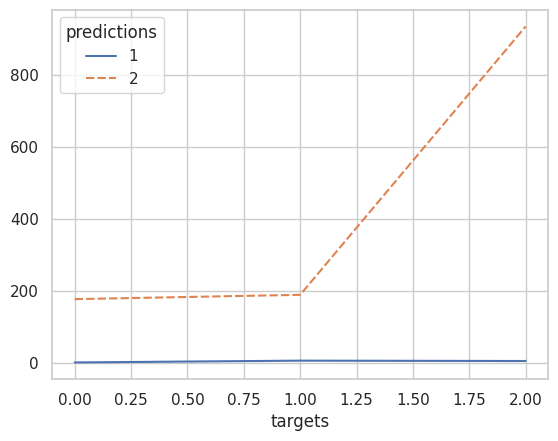

In [33]:
# create a lineplot from df_confusion
sns.lineplot(data=df_confusion)

<Axes: xlabel='Predicted', ylabel='Actual'>

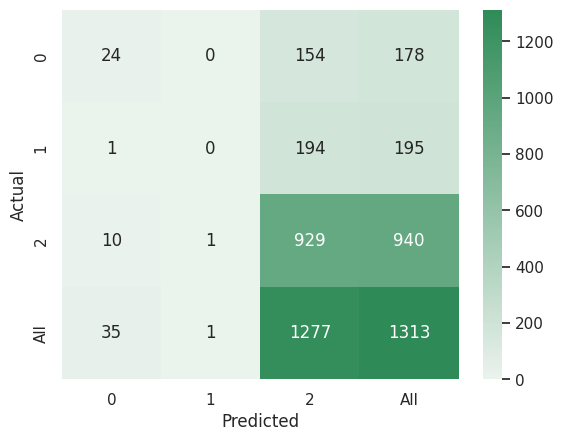

In [10]:
sns.heatmap(df_confusion, cmap=sns.light_palette("seagreen", as_cmap=True), annot=labels, fmt="d")